<a href="https://colab.research.google.com/github/mrislambd/The-Sentiment-of-Movie-Reviews/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#!pip install datasets
# load the data
from datasets import load_dataset

In [39]:
data = load_dataset("rotten_tomatoes")

In [40]:
for review_no, review in enumerate(data["train"]):
  lab = review["label"]
  text = review["text"]
  print(review_no, lab, text)
  if review_no == 5:
    break

0 1 the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
1 1 the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .
2 1 effective but too-tepid biopic
3 1 if you sometimes like to go to the movies to have fun , wasabi is a good place to start .
4 1 emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .
5 1 the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .


In [41]:
import pandas as pd

In [42]:
train_reviews = pd.DataFrame(data["train"])
train_reviews.head()

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


# Exploratory Data Analysis

In [43]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8530 entries, 0 to 8529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8530 non-null   object
 1   label   8530 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.4+ KB


In [44]:
train_reviews.describe()

,label
count,8530.000000
mean,0.500000
std,0.500029
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [45]:
train_reviews.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      4265   4265                   simplistic , silly and tedious .    1
1      4265   4265  the rock is destined to be the 21st century's ...    1

In [46]:
train_reviews['length'] = train_reviews['text'].apply(len)
train_reviews.head()

,text,label,length
0,the rock is destined to be the 21st century's ...,1,177
1,"the gorgeously elaborate continuation of "" the...",1,226
2,effective but too-tepid biopic,1,30
3,if you sometimes like to go to the movies to h...,1,89
4,"emerges as something rare , an issue movie tha...",1,111


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

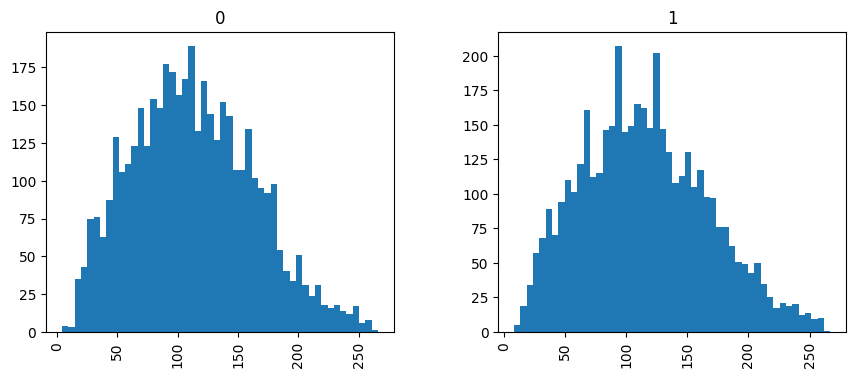

In [48]:
train_reviews.hist(column='length', by='label', bins=50, figsize=(10,4))

In [49]:
train_reviews.length.describe()

,length
count,8530.000000
mean,113.971630
std,51.052231
min,4.000000
25%,76.000000
50%,111.000000
75%,149.000000
max,267.000000


In [50]:
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
def remove_punc(text):
  """
  Takes in a string of text, then removes all punctuation,
  returns a new string
  """
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = "".join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [52]:
train_reviews.head()

,text,label,length
0,the rock is destined to be the 21st century's ...,1,177
1,"the gorgeously elaborate continuation of "" the...",1,226
2,effective but too-tepid biopic,1,30
3,if you sometimes like to go to the movies to h...,1,89
4,"emerges as something rare , an issue movie tha...",1,111


In [53]:
train_reviews['text'].head(5).apply(remove_punc)

,text
0,"[rock, destined, 21st, centurys, new, conan, h..."
1,"[gorgeously, elaborate, continuation, lord, ri..."
2,"[effective, tootepid, biopic]"
3,"[sometimes, like, go, movies, fun, wasabi, goo..."
4,"[emerges, something, rare, issue, movie, thats..."


## Vectorization  

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
bag_of_words_transformer = CountVectorizer(analyzer=remove_punc).fit(train_reviews['text'])
print(len(bag_of_words_transformer.vocabulary_))

18097


In [57]:
review1 = train_reviews['text'][0]
print(review1)

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .


In [58]:
bow1 = bag_of_words_transformer.transform([review1])
print(bow1)
print(bow1.shape)

  (0, 110)	1
  (0, 995)	1
  (0, 2535)	1
  (0, 3205)	1
  (0, 3840)	1
  (0, 4236)	1
  (0, 5436)	1
  (0, 6790)	1
  (0, 6943)	1
  (0, 7431)	1
  (0, 8577)	1
  (0, 9629)	1
  (0, 10675)	1
  (0, 13423)	1
  (0, 13817)	1
  (0, 13955)	1
  (0, 15007)	1
  (0, 15232)	1
  (0, 17175)	1
(1, 18097)


In [59]:
bow1

<1x18097 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [63]:
print(bag_of_words_transformer.get_feature_names_out()[110])
print(bag_of_words_transformer.get_feature_names_out()[17175])

21st
van


In [69]:
train_reviews_bow = bag_of_words_transformer.transform(train_reviews['text'])
print(train_reviews_bow.shape)
print(train_reviews_bow.nnz)


(8530, 18097)
89623


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(train_reviews_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 110)	0.24998976842070267
  (0, 995)	0.22658825202236446
  (0, 2535)	0.28324058284537246
  (0, 3205)	0.2709686965717098
  (0, 3840)	0.2709686965717098
  (0, 4236)	0.2453242137921568
  (0, 5436)	0.1312865562608491
  (0, 6790)	0.17395183498182026
  (0, 6943)	0.2412827265433581
  (0, 7431)	0.18405387932541395
  (0, 8577)	0.28324058284537246
  (0, 9629)	0.1407010205571505
  (0, 10675)	0.14949908865530778
  (0, 13423)	0.2056093238713573
  (0, 13817)	0.23452902017092553
  (0, 13955)	0.28324058284537246
  (0, 15007)	0.24998976842070267
  (0, 15232)	0.21355009201991837
  (0, 17175)	0.22658825202236446


In [71]:
train_reviews_tfidf = tfidf_transformer.transform(train_reviews_bow)
print(train_reviews_tfidf.shape)

(8530, 18097)


In [72]:
from sklearn.naive_bayes import MultinomialNB

movie_review_classifier = MultinomialNB().fit(train_reviews_tfidf, train_reviews['label'])

In [79]:
print('predicted:', movie_review_classifier.predict(train_reviews_tfidf)[2])
print('expected:', train_reviews.label[2])

predicted: 1
expected: 1


In [80]:
all_predictions = movie_review_classifier.predict(train_reviews_tfidf)
print(all_predictions)

[0 1 1 ... 1 0 0]


In [81]:
from sklearn.metrics import classification_report
print (classification_report(train_reviews['label'], all_predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4265
           1       0.94      0.94      0.94      4265

    accuracy                           0.94      8530
   macro avg       0.94      0.94      0.94      8530
weighted avg       0.94      0.94      0.94      8530

